HOUSE PRICE PREDICTION PROJECT

In [1]:
#importing libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
#loding data
df=pd.read_csv("Housing.csv")

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
#checking if null, missing values are present 
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
#converting column data types
mapping={'yes':1,'no':0}
df['mainroad'] = df['mainroad'].map(mapping)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,no,no,no,no,0,no,furnished


In [10]:
mapping={'yes':1,'no':0}
df['guestroom'] = df['guestroom'].map(mapping)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,no,no,no,0,no,furnished


In [11]:
mapping={'yes':1,'no':0}
df['basement'] = df['basement'].map(mapping)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,0,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,0,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,0,no,no,0,no,furnished


In [12]:
df=df.drop('hotwaterheating', axis=1)

In [13]:
df=df.drop('prefarea', axis=1)

In [14]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,yes,2,furnished
1,12250000,8960,4,4,4,1,0,0,yes,3,furnished
2,12250000,9960,3,2,2,1,0,1,no,2,semi-furnished
3,12215000,7500,4,2,2,1,0,1,yes,3,furnished
4,11410000,7420,4,1,2,1,1,1,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,no,2,unfurnished
541,1767150,2400,3,1,1,0,0,0,no,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,no,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,no,0,furnished


In [15]:
mapping={'yes':1,'no':0}
df['airconditioning'] = df['airconditioning'].map(mapping)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,1,2,furnished
1,12250000,8960,4,4,4,1,0,0,1,3,furnished
2,12250000,9960,3,2,2,1,0,1,0,2,semi-furnished
3,12215000,7500,4,2,2,1,0,1,1,3,furnished
4,11410000,7420,4,1,2,1,1,1,1,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,2,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,furnished


In [16]:
mapping={'unfurnished':0,'semi-furnished':1,'furnished':2}
df['furnishingstatus'] = df['furnishingstatus'].map(mapping)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,1,2,2
1,12250000,8960,4,4,4,1,0,0,1,3,2
2,12250000,9960,3,2,2,1,0,1,0,2,1
3,12215000,7500,4,2,2,1,0,1,1,3,2
4,11410000,7420,4,1,2,1,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,2,0
541,1767150,2400,3,1,1,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,2


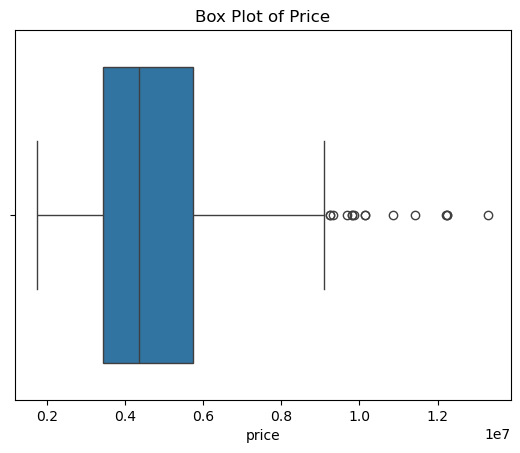

In [18]:
#data visualization
sns.boxplot(x=df['price'])
plt.title('Box Plot of Price')
plt.show()

In [22]:
# 1. Calculate Q1 and Q3
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)

# 2. Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# 3. Define the lower and upper bounds for outliers
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

# 4. Filter the DataFrame to remove outliers
# This keeps all rows where 'price' is within the defined bounds
newdf= df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


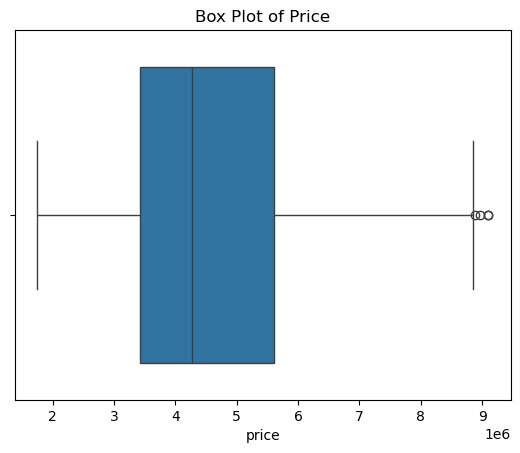

In [24]:
#data visualization
sns.boxplot(x=newdf['price'])
plt.title('Box Plot of Price')
plt.show()

In [29]:
# Calculate IQR bounds
Q1 = newdf['price'].quantile(0.25)
Q3 = newdf['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to keep only the rows within the bounds
# This overwrites the original DataFrame, correctly handling the length mismatch
newdf = newdf[(newdf['price'] >= lower_bound) & (newdf['price'] <= upper_bound)]


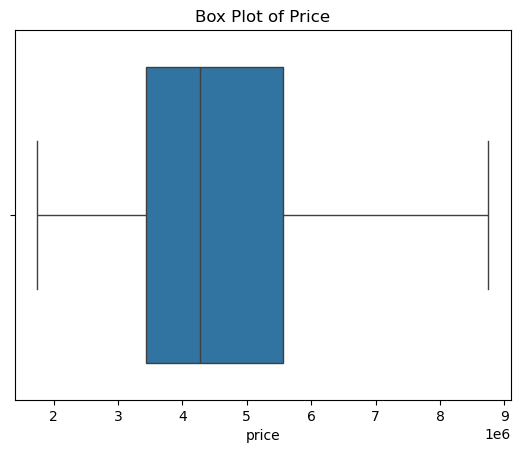

In [30]:
sns.boxplot(x=newdf['price'])
plt.title('Box Plot of Price')
plt.show()

DATA VISUALIZATION

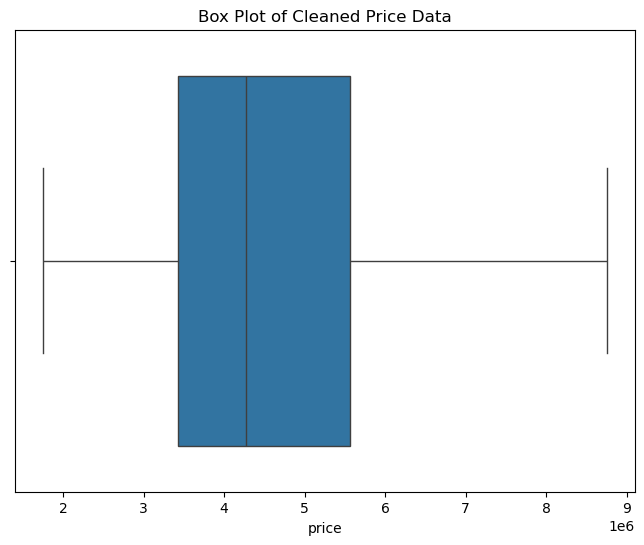

In [31]:
# Create a box plot of the cleaned data
plt.figure(figsize=(8, 6))
sns.boxplot(x=newdf['price'])
plt.title('Box Plot of Cleaned Price Data')
plt.show()

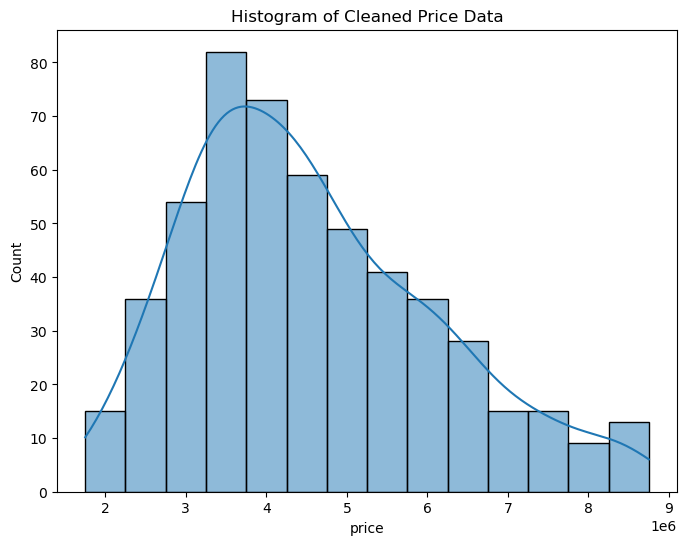

In [32]:
# Create a histogram of the cleaned data
plt.figure(figsize=(8, 6))
sns.histplot(newdf['price'], kde=True)
plt.title('Histogram of Cleaned Price Data')
plt.show()

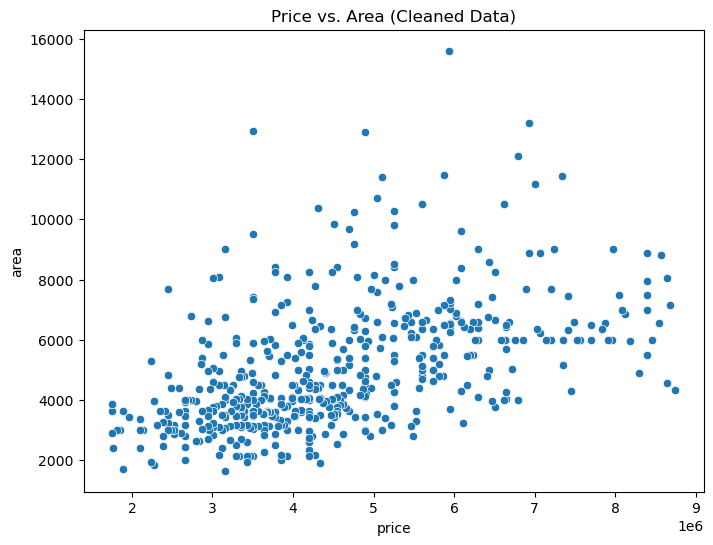

In [36]:
#to visualize relationship 
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='area', data=newdf)
plt.title('Price vs. Area (Cleaned Data)')
plt.show()

In [37]:
newdf

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
20,8750000,4320,3,1,2,1,0,1,0,2,1
21,8680000,7155,3,2,1,1,1,1,1,2,0
22,8645000,8050,3,1,1,1,1,1,1,1,2
23,8645000,4560,3,2,2,1,1,1,1,1,2
24,8575000,8800,3,2,2,1,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,2,0
541,1767150,2400,3,1,1,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,2


In [38]:
# 'price' is the target variable (what we want to predict)
#Dependent Var
y = newdf['price']

# the features columns we will use to predict
#Independent
x = newdf[['area', 'bedrooms','bathrooms','stories','mainroad','guestroom','basement','airconditioning','parking','furnishingstatus']]


In [40]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
#20% of the data will be for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training set has {len(x_train)} samples.")
print(f"Testing set has {len(x_test)} samples.")

Training set has 420 samples.
Testing set has 105 samples.


In [41]:
from sklearn.linear_model import LinearRegression

#Initialize the model
model = LinearRegression()
model.fit(x_train, y_train)

print("Model training is complete.")

Model training is complete.


In [43]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test set
predictions = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 779692.16
R-squared (R²): 0.64


In [44]:
newdf

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
20,8750000,4320,3,1,2,1,0,1,0,2,1
21,8680000,7155,3,2,1,1,1,1,1,2,0
22,8645000,8050,3,1,1,1,1,1,1,1,2
23,8645000,4560,3,2,2,1,1,1,1,1,2
24,8575000,8800,3,2,2,1,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,2,0
541,1767150,2400,3,1,1,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,2


In [45]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,1,2,2
1,12250000,8960,4,4,4,1,0,0,1,3,2
2,12250000,9960,3,2,2,1,0,1,0,2,1
3,12215000,7500,4,2,2,1,0,1,1,3,2
4,11410000,7420,4,1,2,1,1,1,1,2,2


In [56]:
# Create a new DataFrame with the same feature columns
new_data = pd.DataFrame({
    'area': [7000],  
    'bedrooms': [3],
    'bathrooms':[2],
    'stories':[3],
    'mainroad':[1],
    'guestroom':[1],
    'basement':[1],
    'airconditioning':[1],
    'parking':[2],
    'furnishingstatus':[2]
})

print("New data to predict:")
print(new_data)

New data to predict:
   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7000         3          2        3         1          1         1   

   airconditioning  parking  furnishingstatus  
0                1        2                 2  


In [57]:
predicted_price = model.predict(new_data)
print("\nPredicted price for the new data point:")
print(f"The predicted price is: {predicted_price[0]:.2f}")


Predicted price for the new data point:
The predicted price is: 7745868.51


Predicted price 77 lac 45 thousand

In [58]:
# Create a new DataFrame with the same feature columns
new_data1 = pd.DataFrame({
    'area': [5000],  
    'bedrooms': [4],
    'bathrooms':[2],
    'stories':[4],
    'mainroad':[3],
    'guestroom':[2],
    'basement':[2],
    'airconditioning':[2],
    'parking':[3],
    'furnishingstatus':[3]
})

print("New data to predict:")
print(new_data1)

New data to predict:
   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  5000         4          2        4         3          2         2   

   airconditioning  parking  furnishingstatus  
0                2        3                 3  


In [60]:
predicted_price = model.predict(new_data1)
print("\nPredicted price for the new data point:")
print(f"The predicted price is: {predicted_price[0]:.2f}")


Predicted price for the new data point:
The predicted price is: 10616695.02


Price Predicted for building is 1 crore 6 lac